In [1]:
!cd D:\ThisSemester\CompNeuro\Homeworks\Hw4\HW4_Can_Kocagil\Assignment

In [2]:
pwd

'C:\\Users\\Administrator\\Desktop\\_Assignment'

In [3]:
ls

 Volume in drive C is OSIM_VOL
 Volume Serial Number is BEE1-8E64

 Directory of C:\Users\Administrator\Desktop\_Assignment

01.05.2021  18:09    <DIR>          .
01.05.2021  18:09    <DIR>          ..
01.05.2021  18:09    <DIR>          .ipynb_checkpoints
26.01.2021  11:41               993 dispImArray.m
28.04.2021  00:43         4.920.120 EEE482_Can_Kocagil_21602218_Hw4.ipynb
28.04.2021  00:44            20.112 EEE482_Can_Kocagil_21602218_Hw4.py
27.01.2021  21:46           108.328 eee482_homework4.pdf
26.01.2021  11:41            44.149 FastICA_2.5.zip
26.01.2021  11:41         2.206.114 hw4_data1.mat
24.04.2021  22:51               136 MLE_stimulus_error_metrics.csv
               7 File(s)      7.299.952 bytes
               3 Dir(s)  23.544.815.616 bytes free


In [4]:
# Imports:
import numpy as np, matplotlib.pyplot as plt, scipy.stats as stats, pandas as pd
from sklearn.decomposition import PCA, FastICA, NMF
import random, h5py

settings = np.seterr(all='ignore')

### Part A

In [5]:
# Retrieving data:
faces = h5py.File('hw4_data1.mat','r')['faces'][:].T

print(faces.shape)

(1000, 1024)


In [6]:
# Little bit of dimension manipulation for representing images:
N, num_pixel = faces.shape
image_faces = faces.reshape(N, np.int(np.sqrt(num_pixel)), np.int(np.sqrt(num_pixel)))
print(image_faces.shape)

(1000, 32, 32)


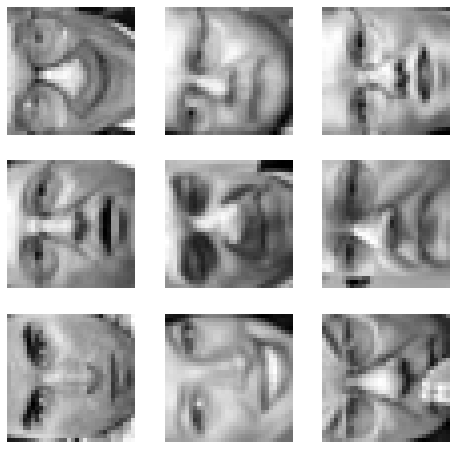

In [7]:
# Let's look at the face images:
fig, axs = plt.subplots(3,3,figsize = (8,8))
for i, axes in enumerate(axs.flatten()):
    axes.imshow(image_faces[i], cmap = 'gray')
    axes.axis('off')

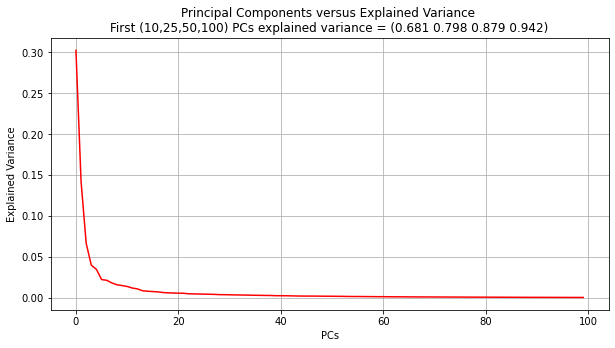

Variance explained by PCA for 10 components  0.681 
Variance explained by PCA for 25 components  0.798 
Variance explained by PCA for 50 components  0.879 
Variance explained by PCA for 100 components 0.942


In [8]:
# Latent representation dimension:
latent_dim = 100
pca = PCA(n_components = latent_dim)
principalComponents = pca.fit_transform(faces)

num2str = lambda x : str(round(sum(x),3))

legends = [

    pca.explained_variance_ratio_[:10],
    pca.explained_variance_ratio_[:25],
    pca.explained_variance_ratio_[:50],
    pca.explained_variance_ratio_[:]

]

legends = list(map(num2str,legends))

plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_, color = 'r')
plt.xlabel('PCs')
plt.ylabel('Explained Variance')
title = 'Principal Components versus Explained Variance \n'
title += 'First (10,25,50,100) PCs explained variance = '
title += '('  + ' '.join(legends) + ')'
plt.title(title)
plt.grid()
plt.show()


pca_logs = f'Variance explained by PCA for 10 components  {legends[0]} \n'
pca_logs += f'Variance explained by PCA for 25 components  {legends[1]} \n'
pca_logs += f'Variance explained by PCA for 50 components  {legends[2]} \n'
pca_logs += f'Variance explained by PCA for 100 components {legends[3]}'
print(pca_logs)


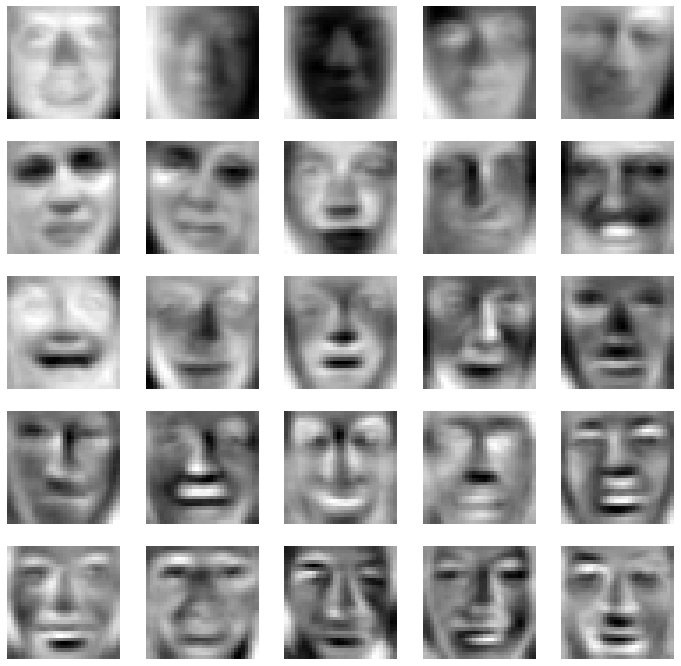

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

### Part B

In [10]:
def pca_reconstruction(data:np.ndarray,
                       trained_pca:PCA,
                       number_PCs:int) -> np.ndarray:
    """
    
        Given the input data, trained PCA variable and # of PCs, reconstruct images based on the PCs components.
        
            
        Arguments:
            - data (np.ndarray) : Input data
            - trained_pca (PCA) : trained PCA variable
            - number_PCs (int)  : # of PCs to reconstruct images
            
        Returns:
            - reconstructed_data (np.ndarray) : Reconsturcted/Predicted data via given # of PCs
    
    
    """
    
    pca_mean = trained_pca.mean_ 
    mean_removed = data - pca_mean
    pca_components = trained_pca.components_[:number_PCs]
    
    return mean_removed @ pca_components.T @ pca_components + pca_mean


def plot_faces(faces:np.ndarray,
               suptitle:str) -> None:
    """
        
        Given the face and its suptitle, plots the 6x6 grid.
        
        Arguments:
            - faces       (np.ndarray) : Face data to be plotted
            - suptitle    (str)        : Suptitle of the visualizatiom
            
        Returns:
            - None

    """
    
    fig, axes = plt.subplots(6, 6, 
                             figsize=(10,10),
                             facecolor='white',
                             subplot_kw= {
                                 'xticks': [],
                                 'yticks':[]
                             }
    )
    fig.suptitle(suptitle,
                 fontsize = '14')
                 
    fig.tight_layout(rect = [0, 0, 1, .95])
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(32, 32).T, cmap='gray')
        ax.set_xlabel(i+1)

In [11]:
faces_PCA_10 = pca_reconstruction(faces,pca,10)
faces_PCA_25 = pca_reconstruction(faces,pca,25)
faces_PCA_50 = pca_reconstruction(faces,pca,50)
faces_PCA_100 = pca.inverse_transform(principalComponents)

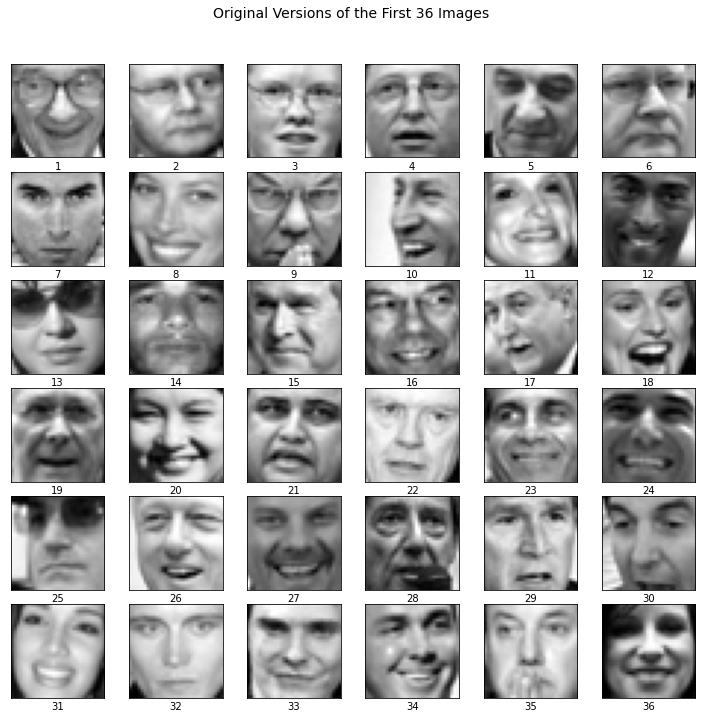

In [12]:
plot_faces(faces,suptitle = 'Original Versions of the First 36 Images')

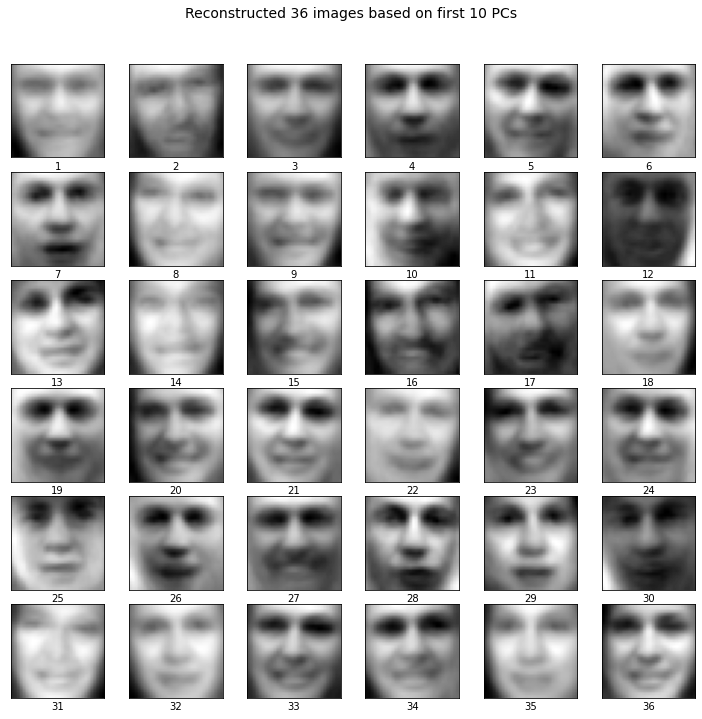

In [13]:
plot_faces(faces_PCA_10,suptitle = 'Reconstructed 36 images based on first 10 PCs')

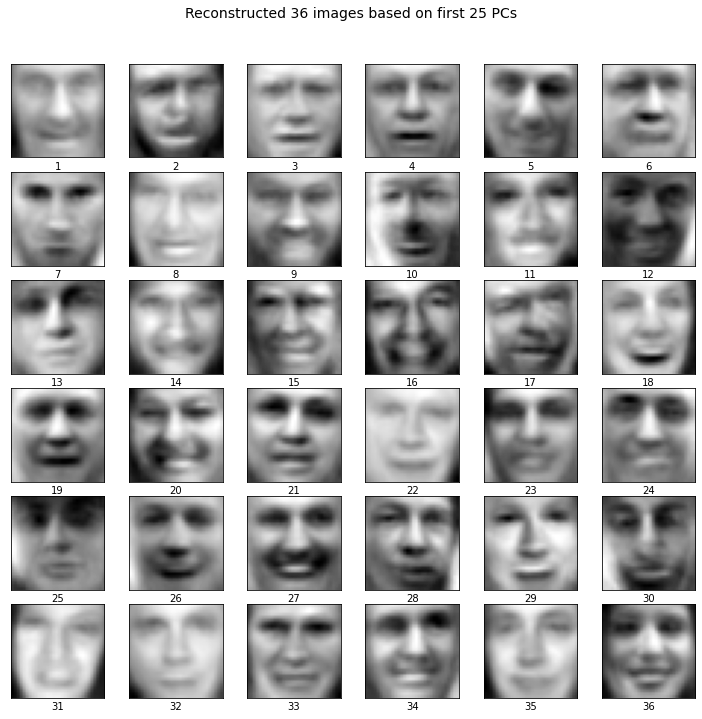

In [14]:
plot_faces(faces_PCA_25,suptitle = 'Reconstructed 36 images based on first 25 PCs')

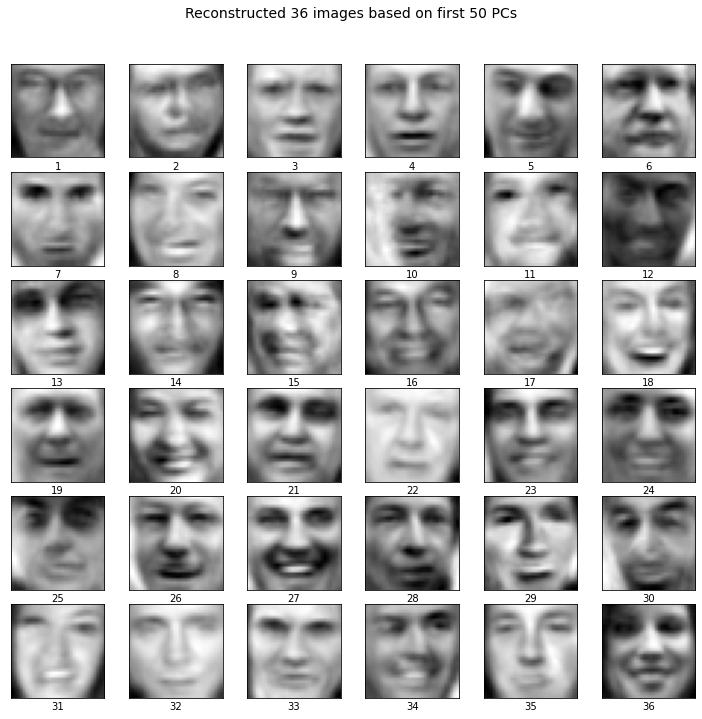

In [15]:
plot_faces(faces_PCA_50,suptitle = 'Reconstructed 36 images based on first 50 PCs')

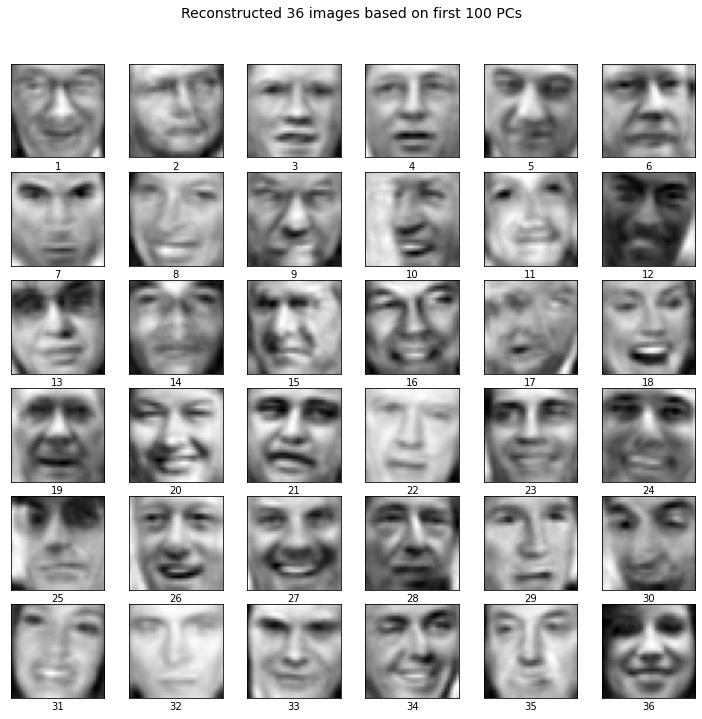

In [16]:
plot_faces(faces_PCA_100, suptitle = 'Reconstructed 36 images based on first 100 PCs')

In [17]:
def squared_error(y_true:np.ndarray,y_pred:np.ndarray) -> np.ndarray:
    """
        Given the grounth truth matrix and prediction, computes element wise squared error.
        
            
        Arguments:
            - y_true  (np.ndarray) : grounth truth
            - y_pred  (np.ndarray) : prediction
            
        Returns:
            square_error (np.ndarray) : Point-wise MSE loss
    
    """
    assert y_true.shape == y_pred.shape, f'Mismatch Dimension!, {y_true.shape} does not match with {y_pred.shape}'
    return (y_true - y_pred) ** 2

In [18]:
mse_10 = squared_error(y_true = faces, y_pred = faces_PCA_10)
mse_25 = squared_error(y_true = faces, y_pred = faces_PCA_25)
mse_50 = squared_error(y_true = faces, y_pred = faces_PCA_50)


std_mse_10 = mse_10.mean(-1).std()
std_mse_25 = mse_25.mean(-1).std()
std_mse_50 = mse_50.mean(-1).std()

mean_mse_10 = mse_10.mean()
mean_mse_25 = mse_25.mean()
mean_mse_50 = mse_50.mean()


print(f'PCA reconstruction loss stats based on first 10 PCs, \n (mean,std) = {mean_mse_10,std_mse_10}')
print(f'PCA reconstruction loss stats based on first 25 PCs, \n (mean,std) = {mean_mse_25,std_mse_25}')
print(f'PCA reconstruction loss stats based on first 50 PCs, \n (mean,std) = {mean_mse_50,std_mse_50}')

PCA reconstruction loss stats based on first 10 PCs, 
 (mean,std) = (523.2417453440805, 257.6412001878457)
PCA reconstruction loss stats based on first 25 PCs, 
 (mean,std) = (332.256492372262, 153.11025146210991)
PCA reconstruction loss stats based on first 50 PCs, 
 (mean,std) = (198.42522960032937, 84.17916855177161)


### Part C

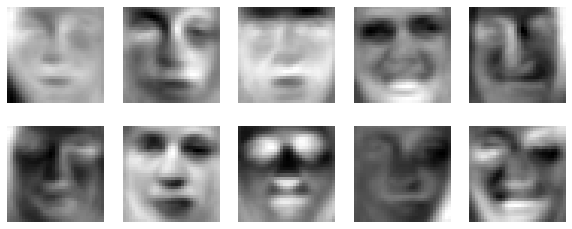

In [19]:
fastIca_10 = FastICA(n_components = 10, random_state = 5)
fastIca_components_10 = fastIca_10.fit_transform(faces)


fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(fastIca_10.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

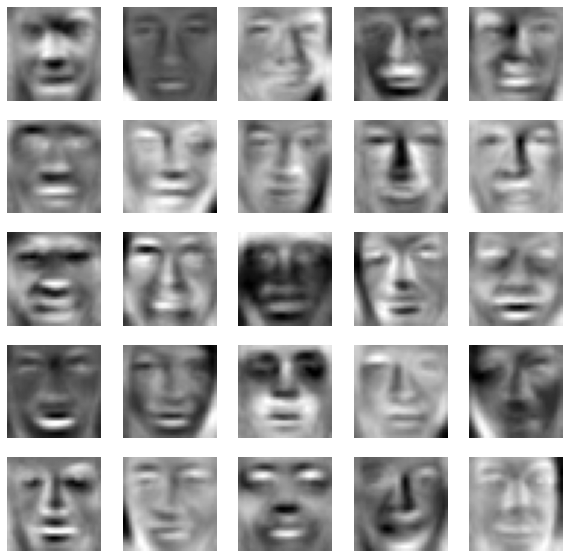

In [20]:
fastIca_25 = FastICA(n_components = 25,whiten = True, random_state = 5)
fastIca_components_25 = fastIca_25.fit_transform(faces)


fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(fastIca_25.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

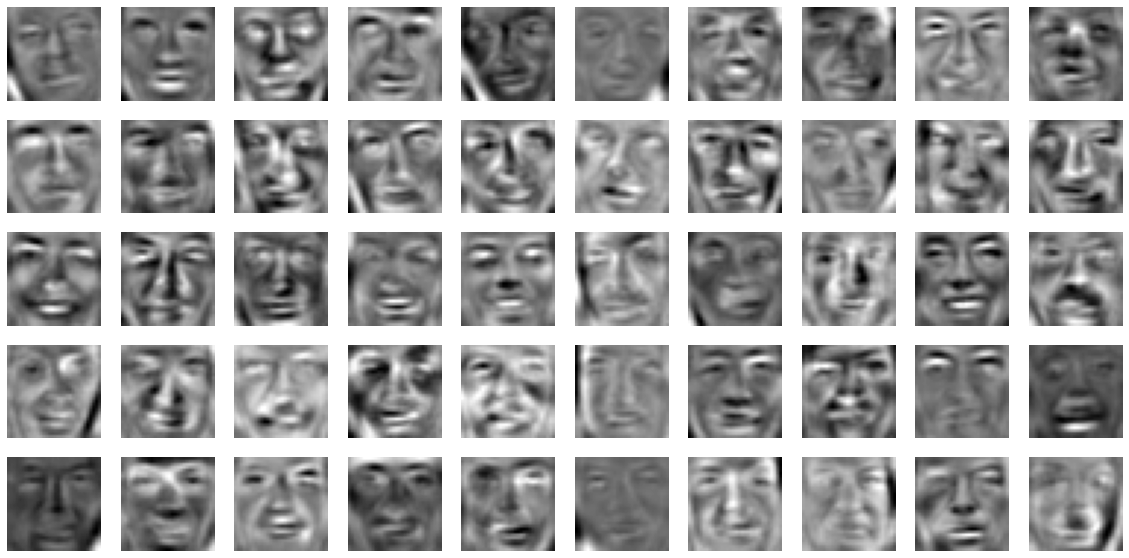

In [21]:
fastIca_50 = FastICA(n_components = 50, random_state = 5)
fastIca_components_50 = fastIca_50.fit_transform(faces)


fig, axes = plt.subplots(5, 10, figsize=(20,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(fastIca_50.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

In [22]:
faces_ICA_10 = fastIca_10.inverse_transform(fastIca_components_10)
faces_ICA_25 = fastIca_25.inverse_transform(fastIca_components_25)
faces_ICA_50 = fastIca_50.inverse_transform(fastIca_components_50)

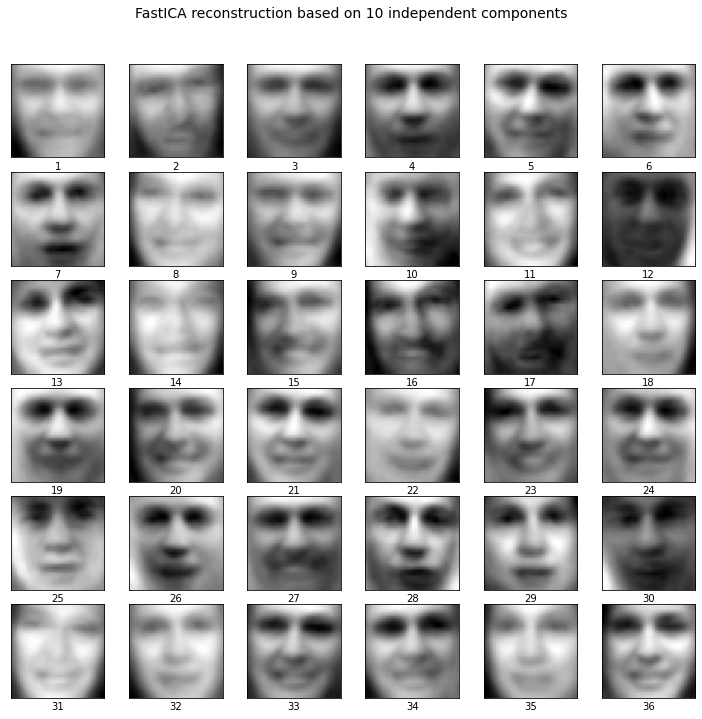

In [23]:
plot_faces(faces_ICA_10, suptitle = 'FastICA reconstruction based on 10 independent components')

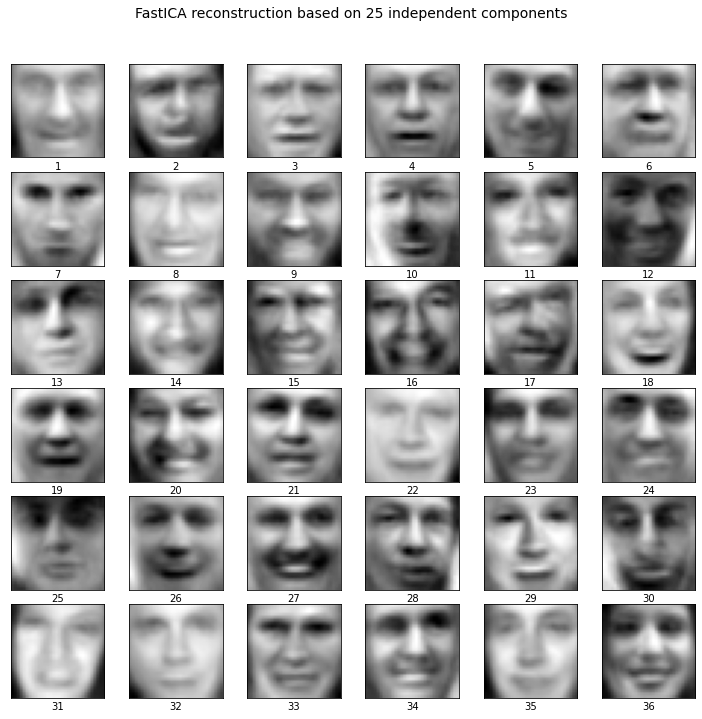

In [24]:
plot_faces(faces_ICA_25, suptitle = 'FastICA reconstruction based on 25 independent components')

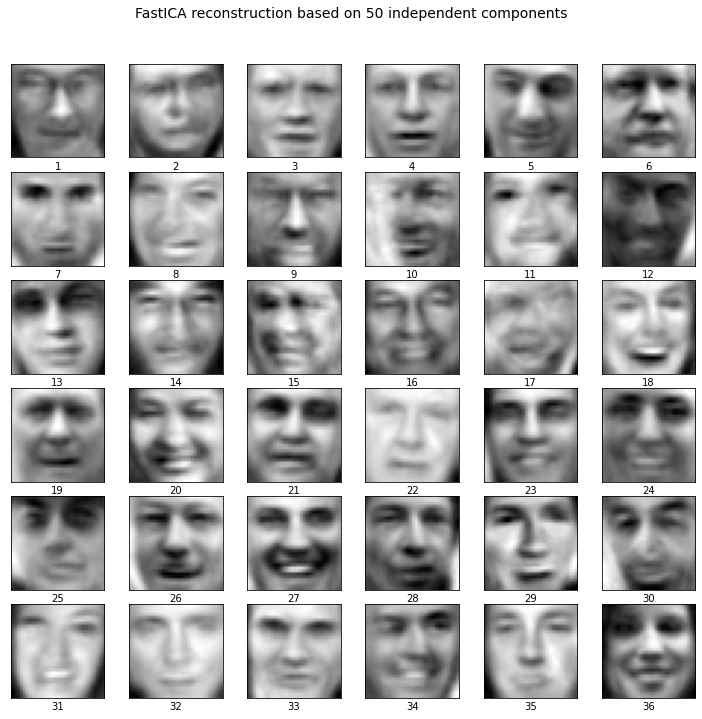

In [25]:
plot_faces(faces_ICA_50, suptitle = 'FastICA reconstruction based on 50 independent components')

In [27]:
mse_10 = squared_error(y_true = faces, y_pred = faces_ICA_10)
mse_25 = squared_error(y_true = faces, y_pred = faces_ICA_25)
mse_50 = squared_error(y_true = faces, y_pred = faces_ICA_50)


std_mse_10 = mse_10.mean(-1).std()
std_mse_25 = mse_25.mean(-1).std()
std_mse_50 = mse_50.mean(-1).std()

mean_mse_10 = mse_10.mean()
mean_mse_25 = mse_25.mean()
mean_mse_50 = mse_50.mean()


print(f'ICA reconstruction loss stats based on first 10 ICs, \n (mean,std) = {mean_mse_10,std_mse_10}')
print(f'ICA reconstruction loss stats based on first 25 ICs, \n (mean,std) = {mean_mse_25,std_mse_25}')
print(f'ICA reconstruction loss stats based on first 50 ICs, \n (mean,std) = {mean_mse_50,std_mse_50}')

ICA reconstruction loss stats based on first 10 ICs, 
 (mean,std) = (523.2417453440556, 257.64120046323825)
ICA reconstruction loss stats based on first 25 ICs, 
 (mean,std) = (332.2564920665104, 153.11028826729748)
ICA reconstruction loss stats based on first 50 ICs, 
 (mean,std) = (198.42506719787568, 84.17996584442906)


### Part D

D:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


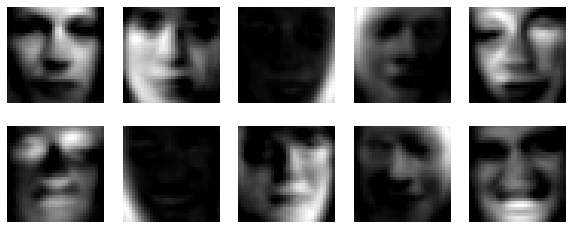

In [28]:
faces = h5py.File('hw4_data1.mat','r')['faces'][:].T
max_iter = 500
faces += np.abs(np.min(faces))
NMF_10 = NMF(n_components = 10, max_iter = max_iter)
NMF_components_10 = NMF_10.fit_transform(faces)


fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(NMF_10.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

D:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


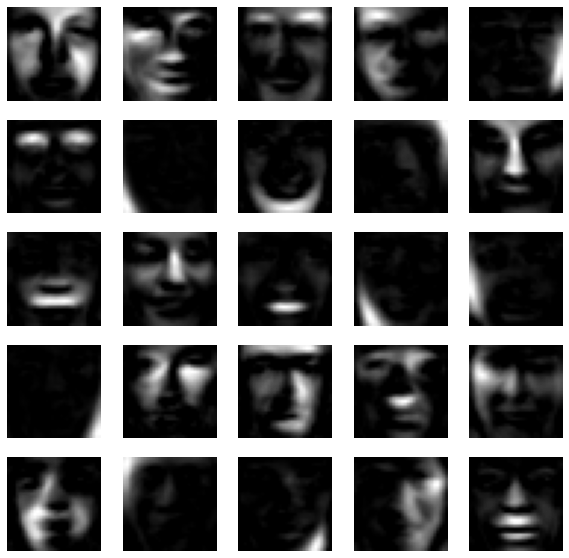

In [29]:
NMF_25 = NMF(n_components = 25, max_iter = max_iter)
NMF_components_25 = NMF_25.fit_transform(faces)


fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(NMF_25.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

D:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


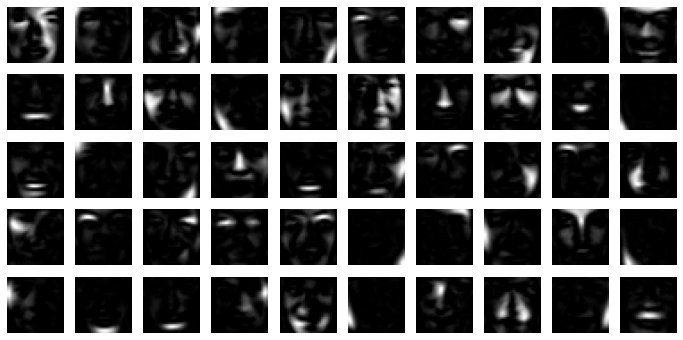

In [30]:
NMF_50 = NMF(n_components = 50, max_iter = max_iter)
NMF_components_50 = NMF_50.fit_transform(faces)


fig, axes = plt.subplots(5, 10, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(NMF_50.components_[i].reshape(32, 32).T, cmap = 'gray')
    ax.axis('off')

In [31]:
faces = h5py.File('hw4_data1.mat','r')['faces'][:].T

faces_NNMF_10 = NMF_10.inverse_transform(NMF_components_10) - np.abs(np.min(faces))
faces_NNMF_25 = NMF_25.inverse_transform(NMF_components_25) - np.abs(np.min(faces))
faces_NNMF_50 = NMF_50.inverse_transform(NMF_components_50) - np.abs(np.min(faces))


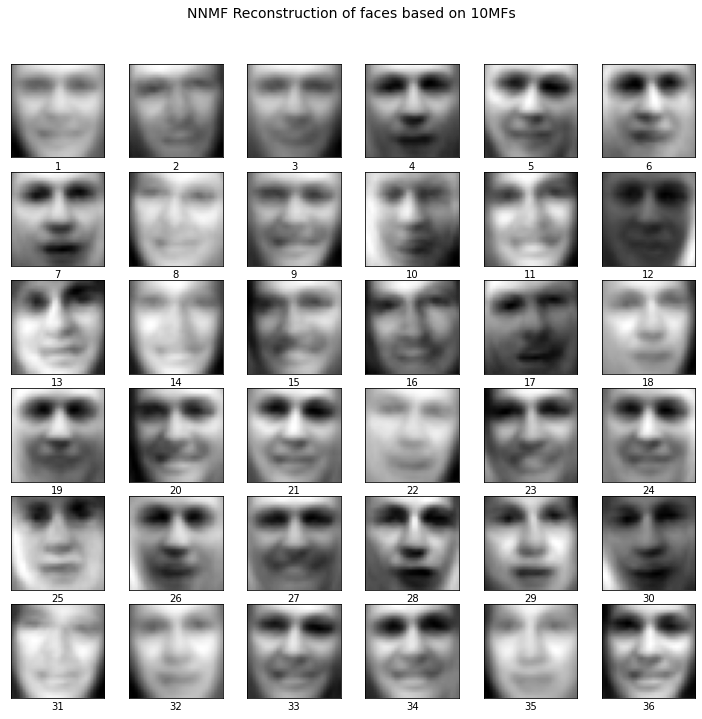

In [32]:
plot_faces(faces_NNMF_10, suptitle = 'NNMF Reconstruction of faces based on 10MFs')

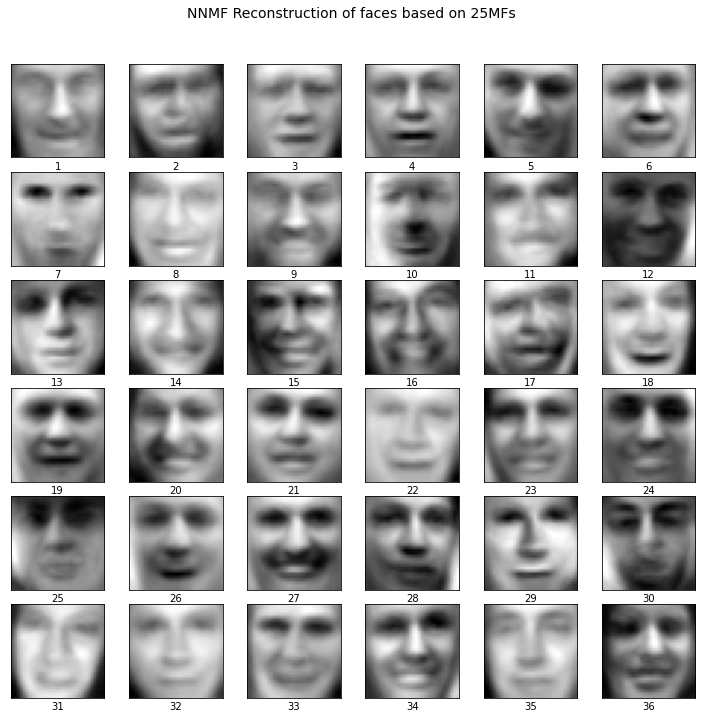

In [33]:
plot_faces(faces_NNMF_25, suptitle = 'NNMF Reconstruction of faces based on 25MFs')

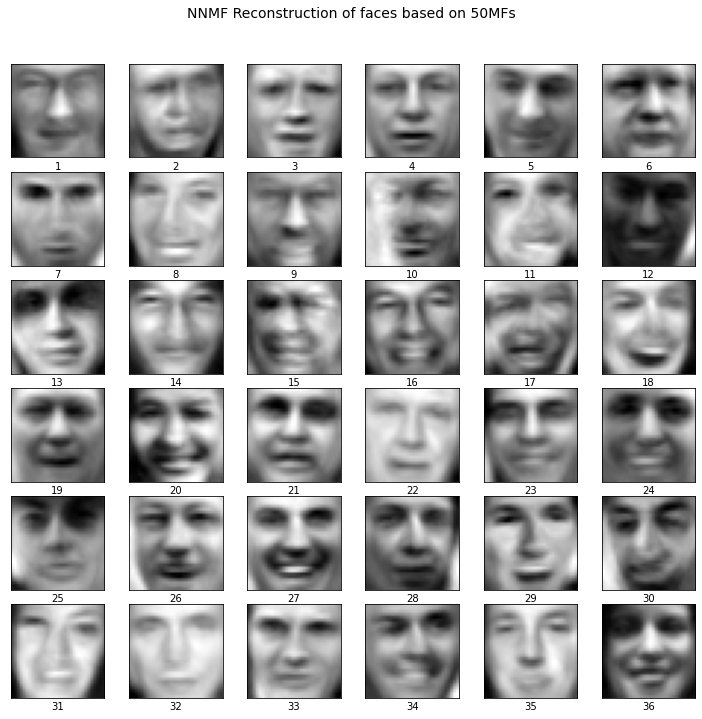

In [34]:
plot_faces(faces_NNMF_50, suptitle = 'NNMF Reconstruction of faces based on 50MFs')

In [35]:
mse_10 = squared_error(y_true = faces, y_pred = faces_NNMF_10)
mse_25 = squared_error(y_true = faces, y_pred = faces_NNMF_25)
mse_50 = squared_error(y_true = faces, y_pred = faces_NNMF_50)


std_mse_10 = mse_10.mean(-1).std()
std_mse_25 = mse_25.mean(-1).std()
std_mse_50 = mse_50.mean(-1).std()

mean_mse_10 = mse_10.mean()
mean_mse_25 = mse_25.mean()
mean_mse_50 = mse_50.mean()


print(f'NNMF reconstruction loss stats based on first 10 MFs, \n (mean,std) = {mean_mse_10,std_mse_10}')
print(f'NNMF reconstruction loss stats based on first 25 MFs, \n (mean,std) = {mean_mse_25,std_mse_25}')
print(f'NNMF reconstruction loss stats based on first 50 MFs, \n (mean,std) = {mean_mse_50,std_mse_50}')

NNMF reconstruction loss stats based on first 10 MFs, 
 (mean,std) = (533.772092855952, 267.38913080061167)
NNMF reconstruction loss stats based on first 25 MFs, 
 (mean,std) = (350.8219774454929, 169.27068097907667)
NNMF reconstruction loss stats based on first 50 MFs, 
 (mean,std) = (221.42980781882426, 104.69596664619671)


#### Q2

### Part A

In [36]:
def gauss_tuning(x:np.ndarray = np.linspace(-15, 16, 500),
                 mu:float = 1,
                 sigma:float = 1,
                 A:float = 1) -> np.float16:
    """
        Gaussian shaped tuning function of a population of neurons.

        Arguments:
            x     (np.ndarray)   : The input stimulus parameters
            A     (float)        : Gain of the Gaussian-shaped tuning curve
            mu    (float)   : Mean of the Gausssian-shaped tuning curve
            sigma (float)        : Standard deviation of the Gaussian-shaped tuning curve

        Returns:
            response : Resulting neural response
        """             
    return A * np.exp(-0.5 * ((x- mu)/sigma) ** 2)

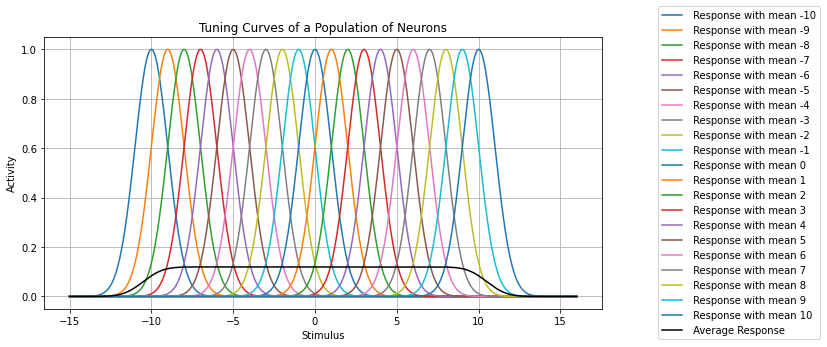

In [37]:
neural_responses = []
legends = []
stimuli = np.linspace(-15, 16, 500)
means = np.arange(-10, 11)
plt.figure(figsize=(10,5))

for mean in means:
    response = gauss_tuning(mu = mean)
    plt.plot(stimuli, response)
    legends.append(f" Response with mean {mean}")
    
    # Let's keep neural responses for future use:
    neural_responses.append(response)

# Plot the tuning profiles
plt.plot(stimuli, np.mean(neural_responses, axis=0), color = '0')
legends.append(f" Average Response")
plt.legend(legends, loc="right", bbox_to_anchor=(1.4, 0.5))
plt.xlabel('Stimulus')
plt.ylabel('Activity')
plt.title('Tuning Curves of a Population of Neurons')
plt.grid()
plt.show()

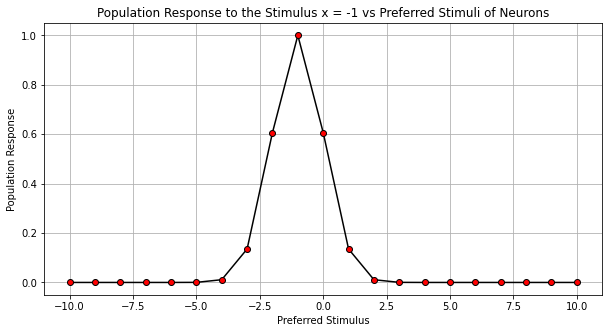

In [38]:
kwargs = dict(
            color = '0',
            marker= 'o',
            markerfacecolor='red'
)
plt.figure(figsize=(10,5))
plt.plot(means, gauss_tuning(-1, mu = means),**kwargs)
plt.xlabel('Preferred Stimulus')
plt.ylabel('Population Response')
plt.title('Population Response to the Stimulus x = -1 vs Preferred Stimuli of Neurons')
plt.grid()
plt.show()

### Part B

In [39]:
def WTA_decoder(stimuli:np.ndarray,response:np.ndarray) -> np.float16:
    """
    Given a population response and  stimuli of the
    neurons, compute the winner-take-all decoder that 
    estimates the actual stimulus as the preferred
    stimulus of the neuron with maximum response

        Arguments:
            stimuli  (np.ndarray): The preferred stimuli of the neurons
            response (np.ndarray): The neural responses
        Returns:
            stimulus (np.float16): the estimated input stimulus that maximizes the response
    """

    response += np.random.normal(loc = 0, scale = 1/20, size = (21,)) 
    return stimuli[np.argmax(response)]

In [40]:
n_trials = 200
stimuli_interval = np.linspace(-5,5, 500).tolist()

# To keep 'responses','stimuli','WTA_stimuli','Errors'
stimuli_response_ = []

for stimuli in random.sample(stimuli_interval, n_trials):
    response = gauss_tuning(stimuli, mu = means)
    WTA_stimuli = WTA_decoder(means, response)
    stimuli_response_.append((response, stimuli, WTA_stimuli, np.abs(WTA_stimuli - stimuli)))
 
# Tuples are gathered:
stimuli_response = list(zip(*stimuli_response_))

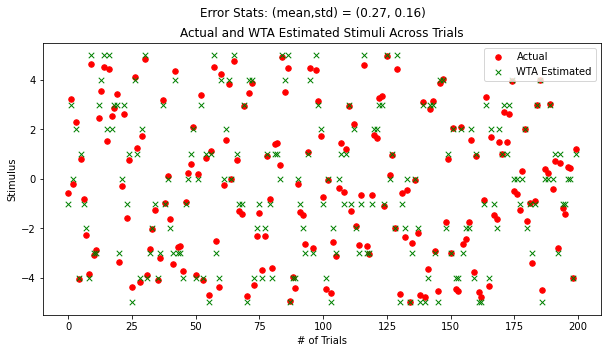

In [41]:
fig = plt.figure(figsize=(10,5))
error = np.array(stimuli_response[-1])
fig.suptitle(f'Error Stats: (mean,std) = {round(error.mean(),2),round(error.std(),2)}')
plt.scatter(range(n_trials), stimuli_response[1], marker="o", color="r", s=30, linewidths=1)
plt.scatter(range(n_trials), stimuli_response[2], marker="x", color="green", s=30, linewidths=1)
plt.xlabel('# of Trials')
plt.ylabel('Stimulus')
plt.title('Actual and WTA Estimated Stimuli Across Trials')
plt.legend(['Actual', 'WTA Estimated'], loc='upper right')
plt.show()

In [42]:
print('Error Statistics for Winner Take All Decoder')
print('Mean of errors in stimuli estimation:', error.mean().round(5))
print('Standard deviation of errors in stimuli estimation :', error.std().round(5))

Error Statistics for Winner Take All Decoder
Mean of errors in stimuli estimation: 0.2711
Standard deviation of errors in stimuli estimation : 0.16082


### Part C

In [43]:
def MLE_decoder(stimuli_interval:np.ndarray = np.linspace(-5,5, 500).tolist(),
                response:np.ndarray = None) -> np.float16:
     
    """
    Given a population response and  stimuli of the
    neurons, compute the MLE decoder that 
    estimates the actual stimulus as the preferred
    stimulus of the neuron with maximum response

        Arguments:
            stimuli  (np.ndarray): The preferred stimuli of the neurons
            response (np.ndarray): The neural responses
        Returns:
            stimulus (np.float16): the estimated input stimulus that maximizes the response
    """


    logs = list()

    for stim in stimuli_interval:
        log = sum((response_ - gauss_tuning(stim, mu_)) ** 2 for response_, mu_ in zip(response, means)) 
           
        logs.append(log)

    idx_stim_max = np.argmin(logs)
    return stimuli_interval[idx_stim_max]
        



In [44]:
MLE_logs_ = list()
for neural_activity in stimuli_response_:
    response, stimulus = neural_activity[:2]
    estimated_stimulus_MLE = MLE_decoder(stimuli_interval, response)
    MLE_logs_.append((stimulus, estimated_stimulus_MLE, np.abs(stimulus - estimated_stimulus_MLE)))
    
            
# Tuples are gathered:
MLE_logs = list(zip(*MLE_logs_))

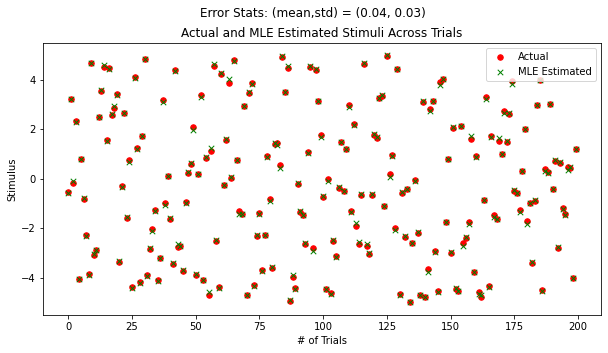

In [45]:
fig = plt.figure(figsize=(10,5))
error = np.array(MLE_logs[2])
fig.suptitle(f'Error Stats: (mean,std) = {round(error.mean(),2),round(error.std(),2)}')
plt.scatter(range(n_trials), MLE_logs[0], marker="o", color="r", s=30, linewidths=1)
plt.scatter(range(n_trials), MLE_logs[1], marker="x", color="green", s=30, linewidths=1)
plt.xlabel('# of Trials')
plt.ylabel('Stimulus')
plt.title('Actual and MLE Estimated Stimuli Across Trials')
plt.legend(['Actual', 'MLE Estimated'], loc='upper right')
plt.show()

In [46]:
print('Error Statistics for MLE Decoder')
print('Mean of errors in stimuli estimation:', error.mean().round(5))
print('Standard deviation of errors in stimuli estimation :', error.std().round(5))

Error Statistics for MLE Decoder
Mean of errors in stimuli estimation: 0.04208
Standard deviation of errors in stimuli estimation : 0.03442


### Part D

In [47]:
def MAP_decoder(stimuli_interval:np.ndarray = np.linspace(-5,5, 500).tolist(),
                response:np.ndarray = None) -> np.float16:
     
    """
    Given a population response and  stimuli of the
    neurons, compute the MAP decoder that 
    estimates the actual stimulus as the preferred
    stimulus of the neuron with maximum response

        Arguments:
            stimuli  (np.ndarray): The preferred stimuli of the neurons
            response (np.ndarray): The neural responses
        Returns:
            stimulus (np.float16): the estimated input stimulus that maximizes the response
    """


    logs = list()

    for stim in stimuli_interval:

       
        log = sum((r - gauss_tuning(stim, m)) ** 2 for r, m in zip(response, means))
        log = log * 200 + (stim ** 2) / 10 
        
        logs.append(log)

    idx_stim_max = np.argmin(logs)
    return stimuli_interval[idx_stim_max]
        



In [48]:
MAP_logs_ = list()
for neural_activity in stimuli_response_:
    response, stimulus = neural_activity[:2]
    estimated_stimulus_MAP = MAP_decoder(stimuli_interval, response)
    MAP_logs_.append((stimulus, estimated_stimulus_MAP, np.abs(stimulus - estimated_stimulus_MAP)))
    
            
# Tuples are gathered:
MAP_logs = list(zip(*MAP_logs_))

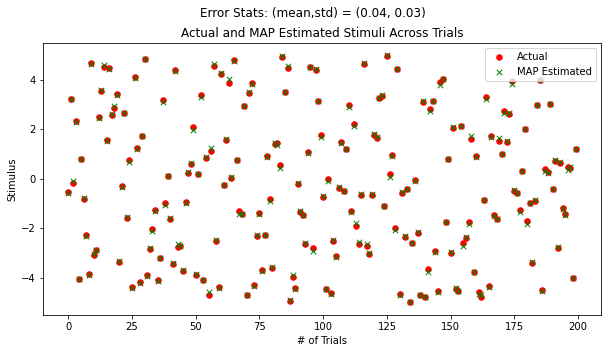

In [49]:
fig = plt.figure(figsize=(10,5))
error = np.array(MAP_logs[2])
fig.suptitle(f'Error Stats: (mean,std) = {round(error.mean(),2),round(error.std(),2)}')
plt.scatter(range(n_trials), MAP_logs[0], marker="o", color="r", s=30, linewidths=1)
plt.scatter(range(n_trials), MAP_logs[1], marker="x", color="green", s=30, linewidths=1)
plt.xlabel('# of Trials')
plt.ylabel('Stimulus')
plt.title('Actual and MAP Estimated Stimuli Across Trials')
plt.legend(['Actual', 'MAP Estimated'], loc='upper right')
plt.show()

In [50]:
print('Error Statistics for MAP Decoder')
print('Mean of errors in stimuli estimation:', error.mean().round(5))
print('Standard deviation of errors in stimuli estimation :', error.std().round(5))

Error Statistics for MAP Decoder
Mean of errors in stimuli estimation: 0.04228
Standard deviation of errors in stimuli estimation : 0.03441


### Part E

In [53]:
stds = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
bias_outer = []

for stimuli in random.sample(stimuli_interval, n_trials):
    bias_inner = []
    for std in stds:
        response = gauss_tuning(stimuli,means,sigma=std)
        response += np.random.normal(loc = 0, scale = 1/20, size = (21,)) 
        stimulus_MLE = MLE_decoder(response=response)
        bias = np.abs(stimuli - stimulus_MLE)
        bias_inner.append(bias)

    bias_outer.append(tuple(bias_inner))

 # Tuples are gathered:
sigmas_response_bias = list(zip(*bias_outer))   

In [55]:
error_stats = {}

for bias, sigma in zip(sigmas_response_bias,stds):
  
    ave_error = np.mean(bias).round(3)
    std_error = np.std(bias).round(3)
    error_stats[sigma] = ave_error, std_error
        
error_stats = pd.DataFrame(error_stats).T
error_stats.columns = ['Mean Error','STD Error']
error_stats.index = stds
error_stats.index.name = 'Sigma Values'
error_stats.sort_values('Mean Error', ascending = True,inplace = True)
print(error_stats.head(n = 6))

              Mean Error  STD Error
Sigma Values                       
1.0                0.044      0.034
0.5                0.055      0.041
2.0                0.080      0.062
5.0                0.420      0.317
0.2                0.769      1.618
0.1                2.081      2.577


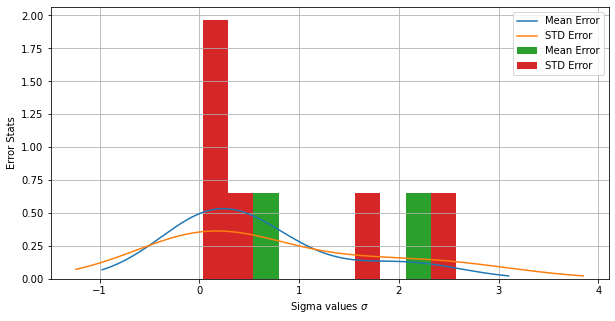

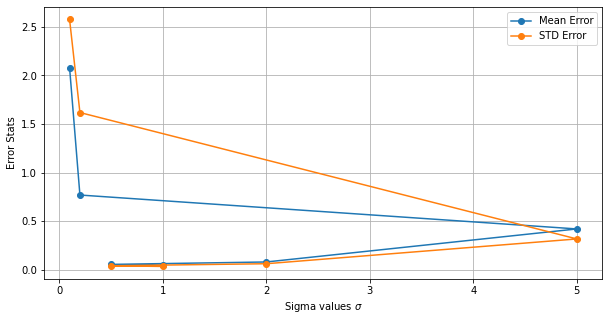

In [56]:
fig, ax = plt.subplots(figsize = (10,5))
error_stats.plot.kde(ax=ax)
error_stats.plot.hist(density=True, ax = ax)
ax.set_ylabel('Error Stats')
ax.set_xlabel('Sigma values $\sigma$')
ax.grid()


fig, ax = plt.subplots(figsize = (10,5))
error_stats.plot(ax=ax,marker = 'o')
ax.set_ylabel('Error Stats')
ax.set_xlabel('Sigma values $\sigma$')
ax.grid()




Please provide question number (1,2)2


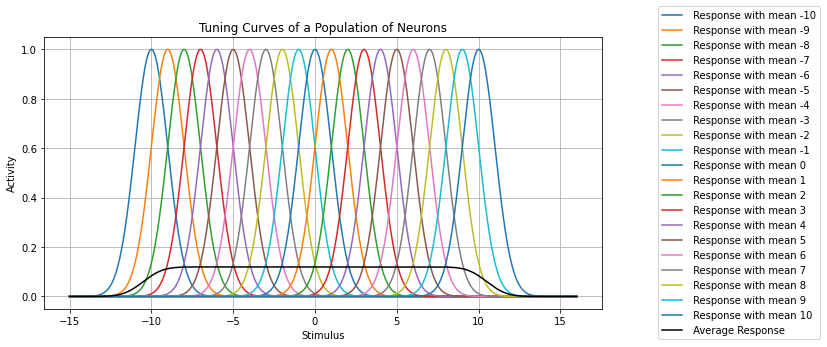

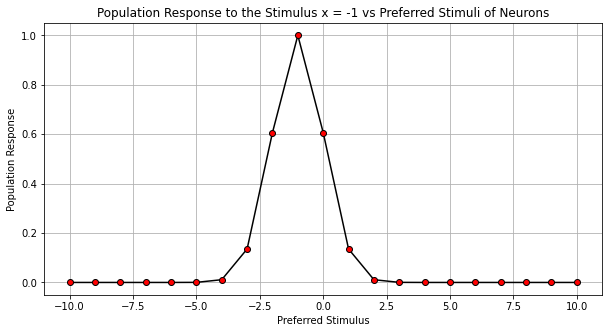

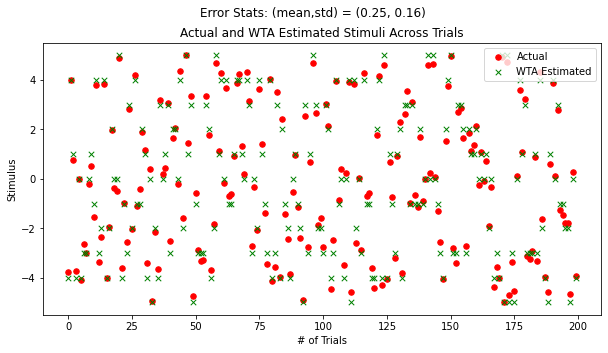

Error Statistics for Winner Take All Decoder
Mean of errors in stimuli estimation: 0.25254
Standard deviation of errors in stimuli estimation : 0.15521


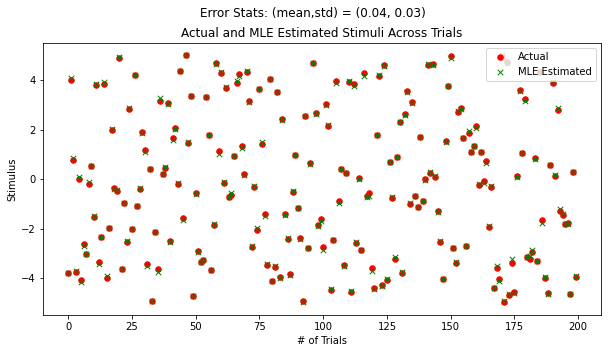

Error Statistics for MLE Decoder
Mean of errors in stimuli estimation: 0.03898
Standard deviation of errors in stimuli estimation : 0.03138


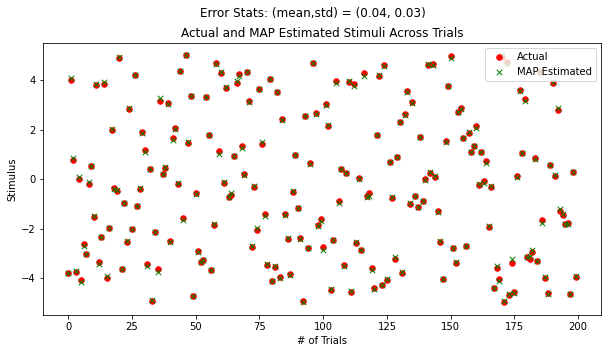

Error Statistics for MAP Decoder
Mean of errors in stimuli estimation: 0.03898
Standard deviation of errors in stimuli estimation : 0.03189


In [ ]:
import sys # Not necessary
        
        
# Imports:
import numpy as np, matplotlib.pyplot as plt, scipy.stats as stats, pandas as pd
from sklearn.decomposition import PCA, FastICA, NMF
import random, h5py
settings = np.seterr(all='ignore')


question = input('Please provide question number (1,2)')

def can_kocagil_21602218_hw4(question):
    if question == '1' :

        


        # ### Part A

        # In[5]:


        # Retrieving data:
        faces = h5py.File('hw4_data1.mat','r')['faces'][:].T

        print(faces.shape)


        # In[6]:


        # Little bit of dimension manipulation for representing images:
        N, num_pixel = faces.shape
        image_faces = faces.reshape(N, np.int(np.sqrt(num_pixel)), np.int(np.sqrt(num_pixel)))
        print(image_faces.shape)


        # In[7]:


        # Let's look at the face images:
        fig, axs = plt.subplots(3,3,figsize = (8,8))
        for i, axes in enumerate(axs.flatten()):
            axes.imshow(image_faces[i], cmap = 'gray')
            axes.axis('off')


        # In[8]:


        # Latent representation dimension:
        latent_dim = 100
        pca = PCA(n_components = latent_dim)
        principalComponents = pca.fit_transform(faces)

        num2str = lambda x : str(round(sum(x),3))

        legends = [

            pca.explained_variance_ratio_[:10],
            pca.explained_variance_ratio_[:25],
            pca.explained_variance_ratio_[:50],
            pca.explained_variance_ratio_[:]

        ]

        legends = list(map(num2str,legends))

        plt.figure(figsize = (10,5))
        plt.plot(pca.explained_variance_ratio_, color = 'r')
        plt.xlabel('PCs')
        plt.ylabel('Explained Variance')
        title = 'Principal Components versus Explained Variance \n'
        title += 'First (10,25,50,100) PCs explained variance = '
        title += '('  + ' '.join(legends) + ')'
        plt.title(title)
        plt.grid()
        plt.show()


        pca_logs = f'Variance explained by PCA for 10 components  {legends[0]} \n'
        pca_logs += f'Variance explained by PCA for 25 components  {legends[1]} \n'
        pca_logs += f'Variance explained by PCA for 50 components  {legends[2]} \n'
        pca_logs += f'Variance explained by PCA for 100 components {legends[3]}'
        print(pca_logs)


        # In[9]:


        fig, axes = plt.subplots(5, 5, figsize=(12,12))
        for i, ax in enumerate(axes.flat):
            ax.imshow(pca.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # ### Part B

        # In[10]:


        def pca_reconstruction(data:np.ndarray,
                               trained_pca:PCA,
                               number_PCs:int) -> np.ndarray:
            """

                Given the input data, trained PCA variable and # of PCs, reconstruct images based on the PCs components.


                Arguments:
                    - data (np.ndarray) : Input data
                    - trained_pca (PCA) : trained PCA variable
                    - number_PCs (int)  : # of PCs to reconstruct images

                Returns:
                    - reconstructed_data (np.ndarray) : Reconsturcted/Predicted data via given # of PCs


            """

            pca_mean = trained_pca.mean_ 
            mean_removed = data - pca_mean
            pca_components = trained_pca.components_[:number_PCs]

            return mean_removed @ pca_components.T @ pca_components + pca_mean


        def plot_faces(faces:np.ndarray,
                       suptitle:str) -> None:
            """

                Given the face and its suptitle, plots the 6x6 grid.

                Arguments:
                    - faces       (np.ndarray) : Face data to be plotted
                    - suptitle    (str)        : Suptitle of the visualizatiom

                Returns:
                    - None

            """

            fig, axes = plt.subplots(6, 6, 
                                     figsize=(10,10),
                                     facecolor='white',
                                     subplot_kw= {
                                         'xticks': [],
                                         'yticks':[]
                                     }
            )
            fig.suptitle(suptitle,
                         fontsize = '14')

            fig.tight_layout(rect = [0, 0, 1, .95])

            for i, ax in enumerate(axes.flat):
                ax.imshow(faces[i].reshape(32, 32).T, cmap='gray')
                ax.set_xlabel(i+1)


        # In[11]:


        faces_PCA_10 = pca_reconstruction(faces,pca,10)
        faces_PCA_25 = pca_reconstruction(faces,pca,25)
        faces_PCA_50 = pca_reconstruction(faces,pca,50)
        faces_PCA_100 = pca.inverse_transform(principalComponents)


        # In[12]:


        plot_faces(faces,suptitle = 'Original Versions of the First 36 Images')


        # In[13]:


        plot_faces(faces_PCA_10,suptitle = 'Reconstructed 36 images based on first 10 PCs')


        # In[14]:


        plot_faces(faces_PCA_25,suptitle = 'Reconstructed 36 images based on first 25 PCs')


        # In[15]:


        plot_faces(faces_PCA_50,suptitle = 'Reconstructed 36 images based on first 50 PCs')


        # In[16]:


        plot_faces(faces_PCA_100, suptitle = 'Reconstructed 36 images based on first 100 PCs')


        # In[17]:


        def squared_error(y_true:np.ndarray,y_pred:np.ndarray) -> np.ndarray:
            """
                Given the grounth truth matrix and prediction, computes element wise squared error.


                Arguments:
                    - y_true  (np.ndarray) : grounth truth
                    - y_pred  (np.ndarray) : prediction

                Returns:
                    square_error (np.ndarray) : Point-wise MSE loss

            """
            assert y_true.shape == y_pred.shape, f'Mismatch Dimension!, {y_true.shape} does not match with {y_pred.shape}'
            return (y_true - y_pred) ** 2


        # In[18]:


        mse_10 = squared_error(y_true = faces, y_pred = faces_PCA_10)
        mse_25 = squared_error(y_true = faces, y_pred = faces_PCA_25)
        mse_50 = squared_error(y_true = faces, y_pred = faces_PCA_50)


        std_mse_10 = mse_10.mean(-1).std()
        std_mse_25 = mse_25.mean(-1).std()
        std_mse_50 = mse_50.mean(-1).std()

        mean_mse_10 = mse_10.mean()
        mean_mse_25 = mse_25.mean()
        mean_mse_50 = mse_50.mean()


        print(f'PCA reconstruction loss stats based on first 10 PCs, \n (mean,std) = {mean_mse_10,std_mse_10}')
        print(f'PCA reconstruction loss stats based on first 25 PCs, \n (mean,std) = {mean_mse_25,std_mse_25}')
        print(f'PCA reconstruction loss stats based on first 50 PCs, \n (mean,std) = {mean_mse_50,std_mse_50}')


        # ### Part C

        # In[19]:


        fastIca_10 = FastICA(n_components = 10, random_state = 5)
        fastIca_components_10 = fastIca_10.fit_transform(faces)


        fig, axes = plt.subplots(2, 5, figsize=(10,4))
        for i, ax in enumerate(axes.flat):
            ax.imshow(fastIca_10.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # In[20]:


        fastIca_25 = FastICA(n_components = 25,whiten = True, random_state = 5)
        fastIca_components_25 = fastIca_25.fit_transform(faces)


        fig, axes = plt.subplots(5, 5, figsize=(10,10))
        for i, ax in enumerate(axes.flat):
            ax.imshow(fastIca_25.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # In[21]:


        fastIca_50 = FastICA(n_components = 50, random_state = 5)
        fastIca_components_50 = fastIca_50.fit_transform(faces)


        fig, axes = plt.subplots(5, 10, figsize=(20,10))
        for i, ax in enumerate(axes.flat):
            ax.imshow(fastIca_50.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # In[22]:


        faces_ICA_10 = fastIca_10.inverse_transform(fastIca_components_10)
        faces_ICA_25 = fastIca_25.inverse_transform(fastIca_components_25)
        faces_ICA_50 = fastIca_50.inverse_transform(fastIca_components_50)


        # In[23]:


        plot_faces(faces_ICA_10, suptitle = 'FastICA reconstruction based on 10 independent components')


        # In[24]:


        plot_faces(faces_ICA_25, suptitle = 'FastICA reconstruction based on 25 independent components')


        # In[25]:


        plot_faces(faces_ICA_50, suptitle = 'FastICA reconstruction based on 50 independent components')


        # In[27]:


        mse_10 = squared_error(y_true = faces, y_pred = faces_ICA_10)
        mse_25 = squared_error(y_true = faces, y_pred = faces_ICA_25)
        mse_50 = squared_error(y_true = faces, y_pred = faces_ICA_50)


        std_mse_10 = mse_10.mean(-1).std()
        std_mse_25 = mse_25.mean(-1).std()
        std_mse_50 = mse_50.mean(-1).std()

        mean_mse_10 = mse_10.mean()
        mean_mse_25 = mse_25.mean()
        mean_mse_50 = mse_50.mean()


        print(f'ICA reconstruction loss stats based on first 10 ICs, \n (mean,std) = {mean_mse_10,std_mse_10}')
        print(f'ICA reconstruction loss stats based on first 25 ICs, \n (mean,std) = {mean_mse_25,std_mse_25}')
        print(f'ICA reconstruction loss stats based on first 50 ICs, \n (mean,std) = {mean_mse_50,std_mse_50}')


        # ### Part D

        # In[28]:


        faces = h5py.File('hw4_data1.mat','r')['faces'][:].T
        max_iter = 500
        faces += np.abs(np.min(faces))
        NMF_10 = NMF(n_components = 10, max_iter = max_iter)
        NMF_components_10 = NMF_10.fit_transform(faces)


        fig, axes = plt.subplots(2, 5, figsize=(10,4))
        for i, ax in enumerate(axes.flat):
            ax.imshow(NMF_10.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # In[29]:


        NMF_25 = NMF(n_components = 25, max_iter = max_iter)
        NMF_components_25 = NMF_25.fit_transform(faces)


        fig, axes = plt.subplots(5, 5, figsize=(10,10))
        for i, ax in enumerate(axes.flat):
            ax.imshow(NMF_25.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # In[30]:


        NMF_50 = NMF(n_components = 50, max_iter = max_iter)
        NMF_components_50 = NMF_50.fit_transform(faces)


        fig, axes = plt.subplots(5, 10, figsize=(12,6))
        for i, ax in enumerate(axes.flat):
            ax.imshow(NMF_50.components_[i].reshape(32, 32).T, cmap = 'gray')
            ax.axis('off')


        # In[31]:


        faces = h5py.File('hw4_data1.mat','r')['faces'][:].T

        faces_NNMF_10 = NMF_10.inverse_transform(NMF_components_10) - np.abs(np.min(faces))
        faces_NNMF_25 = NMF_25.inverse_transform(NMF_components_25) - np.abs(np.min(faces))
        faces_NNMF_50 = NMF_50.inverse_transform(NMF_components_50) - np.abs(np.min(faces))


        # In[32]:


        plot_faces(faces_NNMF_10, suptitle = 'NNMF Reconstruction of faces based on 10MFs')


        # In[33]:


        plot_faces(faces_NNMF_25, suptitle = 'NNMF Reconstruction of faces based on 25MFs')


        # In[34]:


        plot_faces(faces_NNMF_50, suptitle = 'NNMF Reconstruction of faces based on 50MFs')


        # In[35]:


        mse_10 = squared_error(y_true = faces, y_pred = faces_NNMF_10)
        mse_25 = squared_error(y_true = faces, y_pred = faces_NNMF_25)
        mse_50 = squared_error(y_true = faces, y_pred = faces_NNMF_50)


        std_mse_10 = mse_10.mean(-1).std()
        std_mse_25 = mse_25.mean(-1).std()
        std_mse_50 = mse_50.mean(-1).std()

        mean_mse_10 = mse_10.mean()
        mean_mse_25 = mse_25.mean()
        mean_mse_50 = mse_50.mean()


        print(f'NNMF reconstruction loss stats based on first 10 MFs, \n (mean,std) = {mean_mse_10,std_mse_10}')
        print(f'NNMF reconstruction loss stats based on first 25 MFs, \n (mean,std) = {mean_mse_25,std_mse_25}')
        print(f'NNMF reconstruction loss stats based on first 50 MFs, \n (mean,std) = {mean_mse_50,std_mse_50}')

 
    elif question == '2' :


        # #### Q2

        # ### Part A

        # In[36]:


        def gauss_tuning(x:np.ndarray = np.linspace(-15, 16, 500),
                         mu:float = 1,
                         sigma:float = 1,
                         A:float = 1) -> np.float16:
            """
                Gaussian shaped tuning function of a population of neurons.

                Arguments:
                    x     (np.ndarray)   : The input stimulus parameters
                    A     (float)        : Gain of the Gaussian-shaped tuning curve
                    mu    (float)   : Mean of the Gausssian-shaped tuning curve
                    sigma (float)        : Standard deviation of the Gaussian-shaped tuning curve

                Returns:
                    response : Resulting neural response
                """             
            return A * np.exp(-0.5 * ((x- mu)/sigma) ** 2)


        # In[37]:


        neural_responses = []
        legends = []
        stimuli = np.linspace(-15, 16, 500)
        means = np.arange(-10, 11)
        plt.figure(figsize=(10,5))

        for mean in means:
            response = gauss_tuning(mu = mean)
            plt.plot(stimuli, response)
            legends.append(f" Response with mean {mean}")

            # Let's keep neural responses for future use:
            neural_responses.append(response)

        # Plot the tuning profiles
        plt.plot(stimuli, np.mean(neural_responses, axis=0), color = '0')
        legends.append(f" Average Response")
        plt.legend(legends, loc="right", bbox_to_anchor=(1.4, 0.5))
        plt.xlabel('Stimulus')
        plt.ylabel('Activity')
        plt.title('Tuning Curves of a Population of Neurons')
        plt.grid()
        plt.show()


        # In[38]:


        kwargs = dict(
                    color = '0',
                    marker= 'o',
                    markerfacecolor='red'
        )
        plt.figure(figsize=(10,5))
        plt.plot(means, gauss_tuning(-1, mu = means),**kwargs)
        plt.xlabel('Preferred Stimulus')
        plt.ylabel('Population Response')
        plt.title('Population Response to the Stimulus x = -1 vs Preferred Stimuli of Neurons')
        plt.grid()
        plt.show()


        # ### Part B

        # 

        # In[39]:


        def WTA_decoder(stimuli:np.ndarray,response:np.ndarray) -> np.float16:
            """
            Given a population response and  stimuli of the
            neurons, compute the winner-take-all decoder that 
            estimates the actual stimulus as the preferred
            stimulus of the neuron with maximum response

                Arguments:
                    stimuli  (np.ndarray): The preferred stimuli of the neurons
                    response (np.ndarray): The neural responses
                Returns:
                    stimulus (np.float16): the estimated input stimulus that maximizes the response
            """

            response += np.random.normal(loc = 0, scale = 1/20, size = (21,)) 
            return stimuli[np.argmax(response)]


        # In[40]:


        n_trials = 200
        stimuli_interval = np.linspace(-5,5, 500).tolist()

        # To keep 'responses','stimuli','WTA_stimuli','Errors'
        stimuli_response_ = []

        for stimuli in random.sample(stimuli_interval, n_trials):
            response = gauss_tuning(stimuli, mu = means)
            WTA_stimuli = WTA_decoder(means, response)
            stimuli_response_.append((response, stimuli, WTA_stimuli, np.abs(WTA_stimuli - stimuli)))

        # Tuples are gathered:
        stimuli_response = list(zip(*stimuli_response_))


        # In[41]:


        fig = plt.figure(figsize=(10,5))
        error = np.array(stimuli_response[-1])
        fig.suptitle(f'Error Stats: (mean,std) = {round(error.mean(),2),round(error.std(),2)}')
        plt.scatter(range(n_trials), stimuli_response[1], marker="o", color="r", s=30, linewidths=1)
        plt.scatter(range(n_trials), stimuli_response[2], marker="x", color="green", s=30, linewidths=1)
        plt.xlabel('# of Trials')
        plt.ylabel('Stimulus')
        plt.title('Actual and WTA Estimated Stimuli Across Trials')
        plt.legend(['Actual', 'WTA Estimated'], loc='upper right')
        plt.show()


        # In[42]:


        print('Error Statistics for Winner Take All Decoder')
        print('Mean of errors in stimuli estimation:', error.mean().round(5))
        print('Standard deviation of errors in stimuli estimation :', error.std().round(5))


        # ### Part C

        # In[43]:


        def MLE_decoder(stimuli_interval:np.ndarray = np.linspace(-5,5, 500).tolist(),
                        response:np.ndarray = None) -> np.float16:

            """
            Given a population response and  stimuli of the
            neurons, compute the MLE decoder that 
            estimates the actual stimulus as the preferred
            stimulus of the neuron with maximum response

                Arguments:
                    stimuli  (np.ndarray): The preferred stimuli of the neurons
                    response (np.ndarray): The neural responses
                Returns:
                    stimulus (np.float16): the estimated input stimulus that maximizes the response
            """


            logs = list()

            for stim in stimuli_interval:
                log = sum((response_ - gauss_tuning(stim, mu_)) ** 2 for response_, mu_ in zip(response, means)) 

                logs.append(log)

            idx_stim_max = np.argmin(logs)
            return stimuli_interval[idx_stim_max]



        # In[44]:


        MLE_logs_ = list()
        for neural_activity in stimuli_response_:
            response, stimulus = neural_activity[:2]
            estimated_stimulus_MLE = MLE_decoder(stimuli_interval, response)
            MLE_logs_.append((stimulus, estimated_stimulus_MLE, np.abs(stimulus - estimated_stimulus_MLE)))


        # Tuples are gathered:
        MLE_logs = list(zip(*MLE_logs_))


        # In[45]:


        fig = plt.figure(figsize=(10,5))
        error = np.array(MLE_logs[2])
        fig.suptitle(f'Error Stats: (mean,std) = {round(error.mean(),2),round(error.std(),2)}')
        plt.scatter(range(n_trials), MLE_logs[0], marker="o", color="r", s=30, linewidths=1)
        plt.scatter(range(n_trials), MLE_logs[1], marker="x", color="green", s=30, linewidths=1)
        plt.xlabel('# of Trials')
        plt.ylabel('Stimulus')
        plt.title('Actual and MLE Estimated Stimuli Across Trials')
        plt.legend(['Actual', 'MLE Estimated'], loc='upper right')
        plt.show()


        # In[46]:


        print('Error Statistics for MLE Decoder')
        print('Mean of errors in stimuli estimation:', error.mean().round(5))
        print('Standard deviation of errors in stimuli estimation :', error.std().round(5))


        # ### Part D

        # In[47]:


        def MAP_decoder(stimuli_interval:np.ndarray = np.linspace(-5,5, 500).tolist(),
                        response:np.ndarray = None) -> np.float16:

            """
            Given a population response and  stimuli of the
            neurons, compute the MAP decoder that 
            estimates the actual stimulus as the preferred
            stimulus of the neuron with maximum response

                Arguments:
                    stimuli  (np.ndarray): The preferred stimuli of the neurons
                    response (np.ndarray): The neural responses
                Returns:
                    stimulus (np.float16): the estimated input stimulus that maximizes the response
            """


            logs = list()

            for stim in stimuli_interval:


                log = sum((r - gauss_tuning(stim, m)) ** 2 for r, m in zip(response, means))
                log = log * 200 + (stim ** 2) / 10 

                logs.append(log)

            idx_stim_max = np.argmin(logs)
            return stimuli_interval[idx_stim_max]



        # In[48]:


        MAP_logs_ = list()
        for neural_activity in stimuli_response_:
            response, stimulus = neural_activity[:2]
            estimated_stimulus_MAP = MAP_decoder(stimuli_interval, response)
            MAP_logs_.append((stimulus, estimated_stimulus_MAP, np.abs(stimulus - estimated_stimulus_MAP)))


        # Tuples are gathered:
        MAP_logs = list(zip(*MAP_logs_))


        # In[49]:


        fig = plt.figure(figsize=(10,5))
        error = np.array(MAP_logs[2])
        fig.suptitle(f'Error Stats: (mean,std) = {round(error.mean(),2),round(error.std(),2)}')
        plt.scatter(range(n_trials), MAP_logs[0], marker="o", color="r", s=30, linewidths=1)
        plt.scatter(range(n_trials), MAP_logs[1], marker="x", color="green", s=30, linewidths=1)
        plt.xlabel('# of Trials')
        plt.ylabel('Stimulus')
        plt.title('Actual and MAP Estimated Stimuli Across Trials')
        plt.legend(['Actual', 'MAP Estimated'], loc='upper right')
        plt.show()


        # In[50]:


        print('Error Statistics for MAP Decoder')
        print('Mean of errors in stimuli estimation:', error.mean().round(5))
        print('Standard deviation of errors in stimuli estimation :', error.std().round(5))


        # ### Part E

        # In[53]:


        stds = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
        bias_outer = []

        for stimuli in random.sample(stimuli_interval, n_trials):
            bias_inner = []
            for std in stds:
                response = gauss_tuning(stimuli,means,sigma=std)
                response += np.random.normal(loc = 0, scale = 1/20, size = (21,)) 
                stimulus_MLE = MLE_decoder(response=response)
                bias = np.abs(stimuli - stimulus_MLE)
                bias_inner.append(bias)

            bias_outer.append(tuple(bias_inner))

         # Tuples are gathered:
        sigmas_response_bias = list(zip(*bias_outer))   


        # In[55]:


        error_stats = {}

        for bias, sigma in zip(sigmas_response_bias,stds):

            ave_error = np.mean(bias).round(3)
            std_error = np.std(bias).round(3)
            error_stats[sigma] = ave_error, std_error

        error_stats = pd.DataFrame(error_stats).T
        error_stats.columns = ['Mean Error','STD Error']
        error_stats.index = stds
        error_stats.index.name = 'Sigma Values'
        error_stats.sort_values('Mean Error', ascending = True,inplace = True)
        print(error_stats.head(n = 6))


        # 

        # In[56]:


        fig, ax = plt.subplots(figsize = (10,5))
        error_stats.plot.kde(ax=ax)
        error_stats.plot.hist(density=True, ax = ax)
        ax.set_ylabel('Error Stats')
        ax.set_xlabel('Sigma values $\sigma$')
        ax.grid()


        fig, ax = plt.subplots(figsize = (10,5))
        error_stats.plot(ax=ax,marker = 'o')
        ax.set_ylabel('Error Stats')
        ax.set_xlabel('Sigma values $\sigma$')
        ax.grid()



        # In[ ]:


can_kocagil_21602218_hw4(question)
